# Alrighty! Day 3

So far we got a general overview of the data, did some cleaning and attempted (and gave up) on building a manual labelling Tinder like function.

So since we gave up on it yesterday, let's try again today. I mean, this is not an unreasonable task. Someone must have written something that we might be able to use

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import random
import os
from IPython.display import display, Image
import requests
#install pegion

random.seed(82)
%matplotlib inline

When you don't know how something is done, read internet. And if you can't find your answer, read another part of the internet. And if you still can't find it, it means you already skimmed over the solution, so go back and look over **every** resource you looked at. Basically, go to Stack Exchange 

In [2]:
# https://datascience.stackexchange.com/questions/14039/tool-to-label-images-for-classification
# thanks to user jlarsch

# import matplotlib.pyplot as plt
# category=[]
# plt.ion()

# for i,image in enumerate(allImages):
#     plt.imshow(image)
#     plt.pause(0.05)
#     category.append(raw_input('category: '))

After reading documentation on .ion( ), turns out it's an interactive-on mode. So let's load the data set and see if it will work in Jupyter. But where did we save it, so you might think that we need to exit jupyter, open finder or terminal and try find it, but, Jupyter actually lets us run terminal commands right here using the magic operator

In [3]:
%ls

Cleaning.ipynb                     data/
Computer_Vision/                   df_cleaned.pkl
Labelling and more cleaning.ipynb  image_name.jpg
Main.ipynb                         project_youtube/
Main_github.ipynb                  test.py


Right there is our .pkl file, let's read it

In [4]:
df = pd.read_pickle("./df_cleaned.pkl")

In [5]:
df.head()

,video_id,img
0,J_CFBjAyPWE,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,5qxqo2CQakA,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,4Syrtc5aRBY,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,1mpdJcGj8Qg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,coOKvrsmQiI,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962 entries, 0 to 5961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  5962 non-null   object
 1   img       5962 non-null   object
dtypes: object(2)
memory usage: 93.3+ KB


Okay good, we have our cleaned db with 5962 unique elements and their thumbnails. By the way, if we wanted to add more information from the original df (with likes, views, etc) I believe there should a 1-line solution using some variant of .join() operator (might be left/right/inner/outter join, one of those), which would correspond video_ids and simply extend the info.

Oh and we haven't yet added the boolean 'labeled' column, so let's do that too

J_CFBjAyPWE


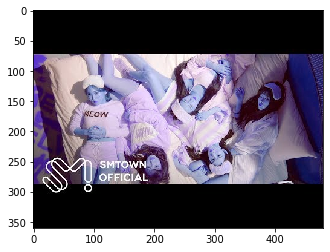

1
5qxqo2CQakA


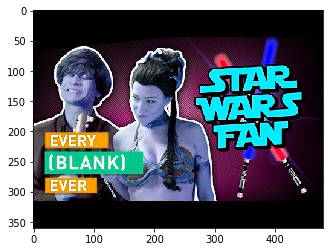

2


In [7]:
import matplotlib.pyplot as plt
%config InlineBackend.close_figures=True

df['labeled'] = False
plt.ion()

for index, row in df.iterrows():
#for i,image in enumerate(allImages):
    vid, img, labeled = row
    print(vid)
    plt.imshow(img)
    plt.pause(0.05)
    x = input()
    if (index == 1):
        break

Bad news, StackExchange solution is no good with Jupyter. I mean, okay, Jupyter is not really the place to do this kind of things. So what, 

# DO WE JUST GIVE UP AGAIN? HELL NO, LET'S GIVE IT ONE MORE SHOT. GOOGLE BETTER

In [9]:
from pigeon import annotate
annotations = annotate(
  ['I love this movie', 'I was really disappointed by the book'],
  options=['positive', 'negative']
)

HTML(value='0 examples annotated, 3 examples left')

Output()

Okay! This is fantastic. I found a pegion library written by this god-human being agermanidis (https://github.com/agermanidis/pigeon)

It does exactly what I wanted but better. 

In [13]:
from pigeon import annotate
from IPython.display import display, Image

annotations = annotate(
  ['data/imgs/J_CFBjAyPWE.jpg', 'data/imgs/J_CFBjAyPWE.jpg', 'data/imgs/5qxqo2CQakA.jpg'],
  options=['Clickbait', 'Not_Clickbait'],
  display_fn=lambda filename: display(Image(filename))
)

HTML(value='0 examples annotated, 4 examples left')

Output()

In [14]:
annotations

[]

So pigeon provides us an annotate function. Here are the function paremeters:

In [16]:
help(annotate)

Help on function annotate in module pigeon.annotate:

annotate(examples, options=None, shuffle=False, include_skip=True, display_fn=<function display at 0x10448a170>)
    Build an interactive widget for annotating a list of input examples.
    
    Parameters
    ----------
    examples: list(any), list of items to annotate
    options: list(any) or tuple(start, end, [step]) or None
             if list: list of labels for binary classification task (Dropdown or Buttons)
             if tuple: range for regression task (IntSlider or FloatSlider)
             if None: arbitrary text input (TextArea)
    shuffle: bool, shuffle the examples before annotating
    include_skip: bool, include option to skip example while annotating
    display_fn: func, function for displaying an example to the user
    
    Returns
    -------
    annotations : list of tuples, list of annotated examples (example, label)



So it will return list of tuples (example, label). In case of Skip, element won't be added. If we want the skip to be added to the list we can simply add Skip as one of the options and set include_slip=False.

We would need to pass video_ids as examples, and set 

<code>display_fn = lambda filename:  display(Image(f'data/imgs/{filename}.jpg'))</code>

In [17]:
df.head()

,video_id,img,labeled
0,J_CFBjAyPWE,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",False
1,5qxqo2CQakA,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",False
2,4Syrtc5aRBY,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",False
3,1mpdJcGj8Qg,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",False
4,coOKvrsmQiI,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",False


Since we are not going to label all 6k right away, it would be a good idea to create a function which chooses 100 unlabaled images and run the pigeon.annotate on them. Then returns new labels which we can add to our DataFrame.

On a different note, let's imporve the way we deal with our df. 

The thing that we should do which we didn't do so far is to randomize rows in df. **Always randomize**

After that let's add a "Clickbait?" column with "None" default value

In [18]:
df["Clickbait"] = None

In [19]:
#%pip install sklearn

In [20]:
from sklearn.utils import shuffle
df = shuffle(df)

In [21]:
df.head()

,video_id,img,labeled,Clickbait
2077,hZr1u-zzejU,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",False,None
558,6xUnndUTDBQ,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",False,None
4427,RMWTNik9i_8,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",False,None
5079,qmcVlPqy9-o,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",False,None
3621,fDRrqJU4-Tk,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",False,None


Okay, so we shuffled and *tried* setting video_id to index. Now we need to write a function to create 100 (10 for now) annotations 

In [ ]:
def pick100(df):
    df[df["video_id"]== oGmIFXfgPM4]


for vid, row in df.iterrows():
    img, labeled, clickbait = row
    print(vid)
    print(labeled)
    break

In [27]:
df[df["labeled"] == False]["video_id"][:10]

2077    hZr1u-zzejU
558     6xUnndUTDBQ
4427    RMWTNik9i_8
5079    qmcVlPqy9-o
3621    fDRrqJU4-Tk
2028    TncLBbJ8SZo
1070    8d_202l55LU
3738    0ANDjPQPS_Q
1893    p-bGJ6W1Im4
3802    PHLY4a5fTjU
Name: video_id, dtype: object